In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.environ['PHD_CODE']
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [4]:
from epypes import pipeline
from epypes.compgraph import CompGraph, CompGraphRunner, get_networkx_graph

from rpa.io import open_image

In [5]:
def grayscale(im):
    return cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# cv2.Canny(im, low_threshold, high_threshold)

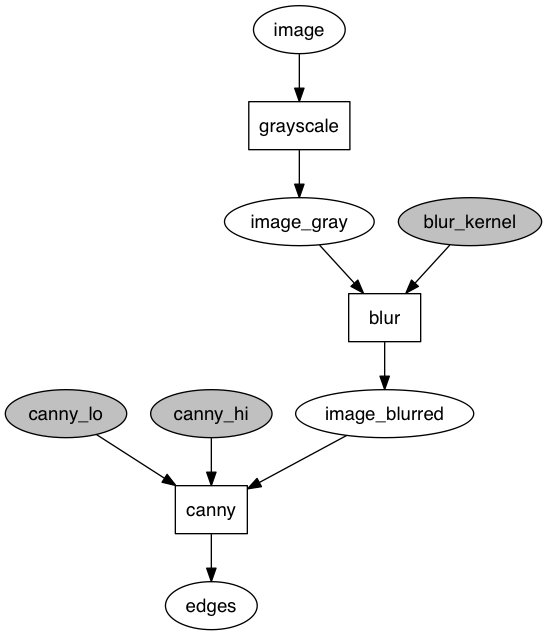

In [6]:
func_dict = {
    'grayscale': grayscale,
    'canny': cv2.Canny,
    'blur': gaussian_blur
}

func_io = {
    'grayscale': ('image', 'image_gray'),
    'blur': (('image_gray', 'blur_kernel'), 'image_blurred'),
    'canny': (('image_blurred', 'canny_lo', 'canny_hi'), 'edges'),
}

cg = CompGraph(func_dict, func_io)

params = {
    'blur_kernel': 11,
    'canny_lo': 70,
    'canny_hi': 200
}

runner = CompGraphRunner(cg, params)

nxg = get_networkx_graph(runner, style_attrs={'fontname': 'Helvetica'})
nxpd.draw(nxg)

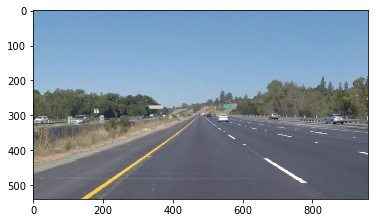

In [7]:
# Image from https://github.com/udacity/CarND-LaneLines-P1/tree/master/test_images

im = open_image('../data/solidYellowLeft.jpg', read_flag=cv2.IMREAD_COLOR, color_transform=cv2.COLOR_BGR2RGB)

plt.imshow(im)

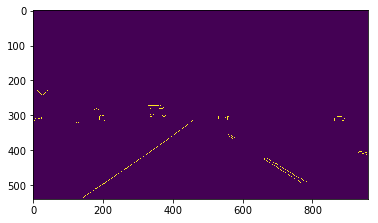

In [8]:
runner.run(image=im)

plt.imshow(runner['edges'])